# KNN: MNIST Dataset

In [2]:
from scipy.io import loadmat

mnist_raw = loadmat("mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

X, y = mnist['data'], mnist['target']

In [3]:
import numpy as np

shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:20000], X[69000:], y[:20000], y[69000:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 784) (1000, 784) (20000,) (1000,)


## Exploring the MNIST dataset

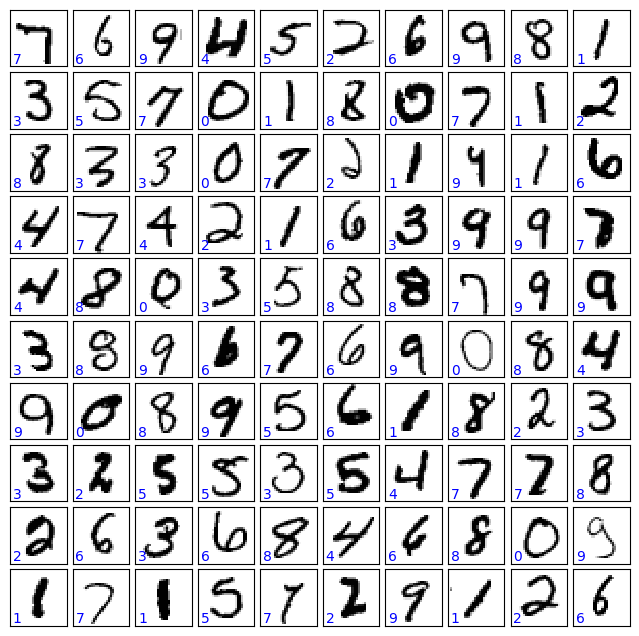

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(int(y_train[i])),
           transform=ax.transAxes, color='blue')

plt.show()

## KNN Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
y_model = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.952

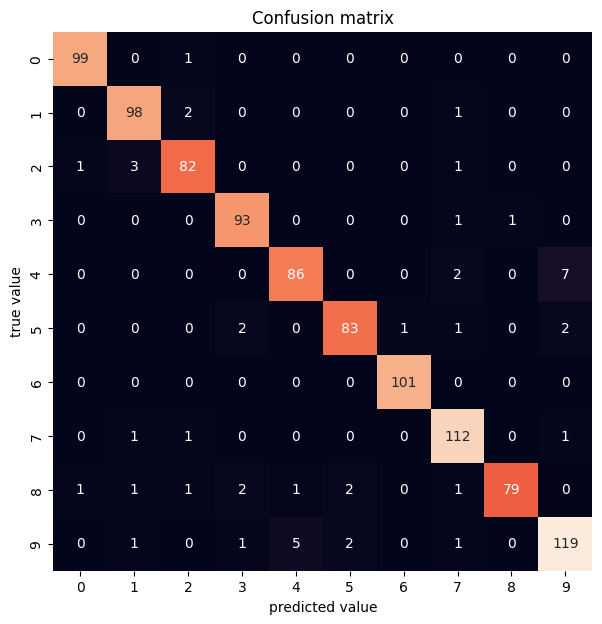

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_model)

plt.figure(figsize=(7,7))
plt.title("Confusion matrix")
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

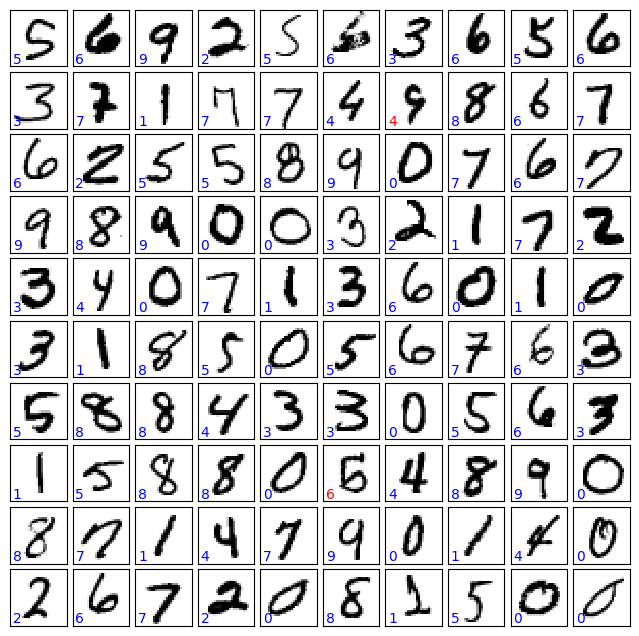

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(int(y_model[i])),
           transform=ax.transAxes,
            color='blue' if (y_test[i] == y_model[i]) else 'red')

plt.show()